In [38]:
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
def codeToReadTxtFile(filename):

    epoch_num = 0
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0
    outer_dictionary = {}
    dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):

            line = lines[i].split()
            if (i%2 == 0):
                dictionary = {}

                epoch_num = int(line[1].split('/')[0])
                accuracy = float(line[7].split('%')[0])
                dictionary['train_accuracy'] = accuracy
                precision = float(line[10].split(',')[0])
                dictionary['train_precision'] = precision
                recall = float(line[13].split(',')[0])
                dictionary['train_recall'] = recall
                f1 = float(line[16])
                dictionary['train_f1'] = f1
                # print(epoch_num, accuracy, precision, recall, f1)

            else:
                
                accuracy = float(line[5].split('%')[0])
                dictionary['val_accuracy'] = accuracy
                precision = float(line[8].split(',')[0])
                dictionary['val_precision'] = precision
                recall = float(line[11].split(',')[0])
                dictionary['val_recall'] = recall
                f1 = float(line[14])
                dictionary['val_f1'] = f1

                outer_dictionary[epoch_num] = dictionary
    
    return outer_dictionary

In [40]:
def codeToPlot(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 25)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [41]:
df = pd.DataFrame.from_dict(codeToReadTxtFile("WithCoTRM_LORA.txt"), orient='index') 
df

,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
1,18.437500,0.076905,0.184375,0.108303,21.354167,0.045600,0.213542,0.075152
2,20.104167,0.079077,0.201042,0.112936,18.854167,0.035548,0.188542,0.059818
3,19.062500,0.070613,0.190625,0.101155,19.583333,0.038351,0.195833,0.064141
4,18.437500,0.069139,0.184375,0.100562,20.208333,0.040838,0.202083,0.067945
5,20.520833,0.074349,0.205208,0.107952,18.541667,0.034379,0.185417,0.058004
6,20.312500,0.076367,0.203125,0.110952,16.979167,0.028829,0.169792,0.049289
7,20.729167,0.071398,0.207292,0.093253,17.500000,0.030625,0.175000,0.052128
8,18.645833,0.068401,0.186458,0.098824,19.479167,0.037944,0.194792,0.063515
9,20.416667,0.081781,0.204167,0.116703,17.395833,0.030262,0.173958,0.051555
10,18.854167,0.074598,0.188542,0.106812,17.083333,0.029184,0.170833,0.049852


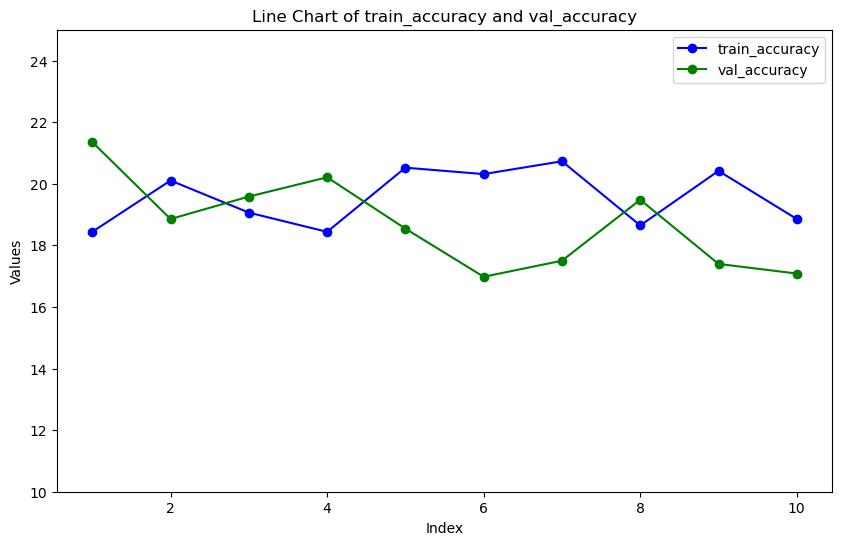

In [42]:
codeToPlot(df, 'train_accuracy', 'val_accuracy', 'demo.png')